In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
selected_data_dir = '/global/cfs/cdirs/m3246/ewitkowski/selected_data'
selected_pT = h5py.File(f'{selected_data_dir}/recoPFCandidates_particleFlow__RECO_obj_pt_.h5', 'r')
selected_eta = h5py.File(f'{selected_data_dir}/recoPFCandidates_particleFlow__RECO_obj_eta_.h5', 'r')
selected_phi = h5py.File(f'{selected_data_dir}/recoPFCandidates_particleFlow__RECO_obj_phi_.h5', 'r')
selected_pdgId = h5py.File(f'{selected_data_dir}/recoPFCandidates_particleFlow__RECO_obj_pdgId_.h5', 'r')

In [ ]:
chunk_size = 5096
masses = np.empty(len(selected_pdgId['values']))

for start in range(0,len(selected_pdgId['values']),chunk_size):
    end = start + chunk_size

    id_chunk = selected_pdgId['values'][start:end]
    muon_idx = (np.abs(id_chunk) == 13)

    muon_pT = selected_pT['values'][start:end][muon_idx].reshape(-1,2)
    muon_eta = selected_eta['values'][start:end][muon_idx].reshape(-1,2)
    muon_phi = selected_phi['values'][start:end][muon_idx].reshape(-1,2)

    masses[start:end] = np.sqrt(2*muon_pT[:,0]*muon_pT[:,1]*(
        np.cosh(muon_eta[:,0]-muon_eta[:,1])-np.cos(muon_phi[:,0]-muon_phi[:,1])))

In [5]:
label_fontsize = 20
title_fontsize = 22
legend_fontsize = 12
tick_fontsize = 14

def make_plot(x, label, bins = 32):

    fig, ax = plt.subplots()

    ax.hist(x, bins = bins, histtype = "step", density = True, color = "blue", alpha = 0.75, linewidth = 2);

    ax.tick_params(labelsize=tick_fontsize)
    ax.set_xlabel(label, fontsize=label_fontsize)
    ax.set_ylabel("Density", fontsize=label_fontsize)


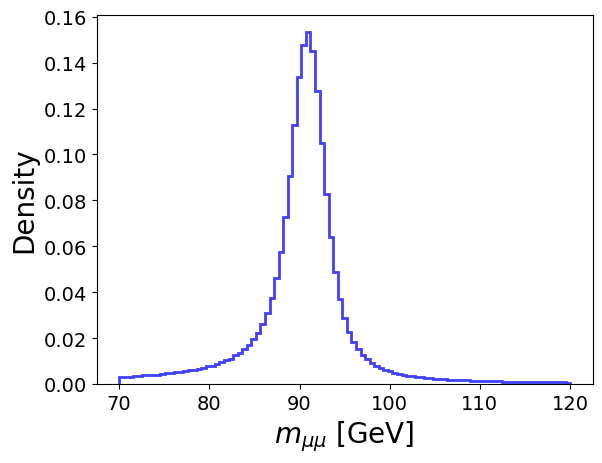

In [10]:
make_plot(masses, "$m_{\mu\mu}$ [GeV]", bins = np.linspace(70, 120, 100))

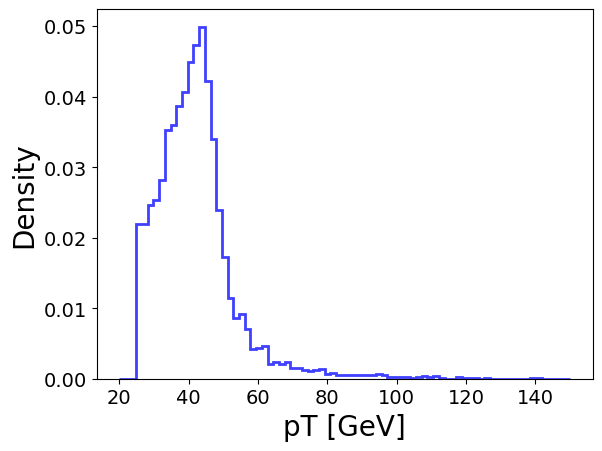

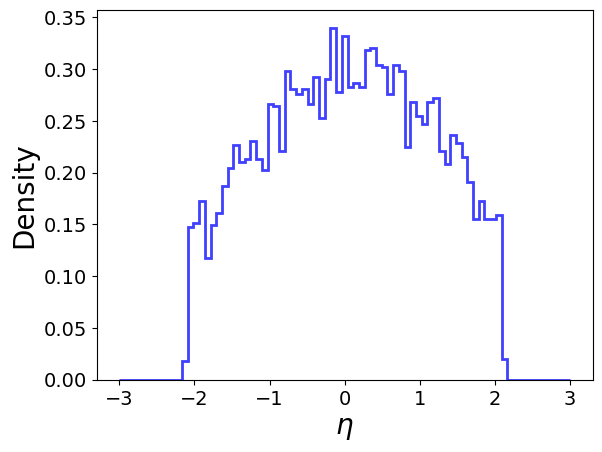

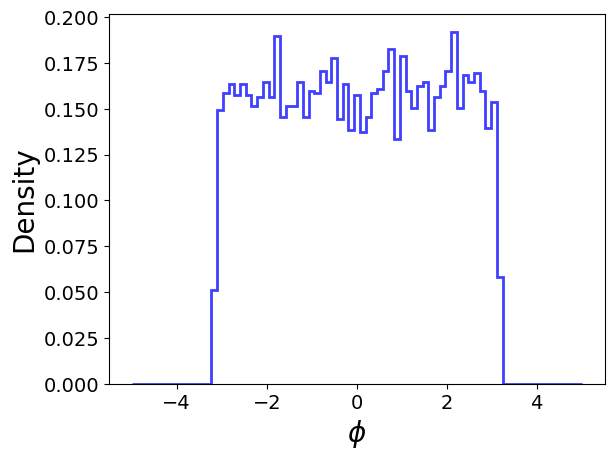

In [12]:
make_plot(muon_pT.reshape(-1,1), "pT [GeV]", bins = np.linspace(20, 150, 80))
make_plot(muon_eta.reshape(-1,1), "$\eta$", bins = np.linspace(-3, 3, 80))
make_plot(muon_phi.reshape(-1,1), "$\phi$", bins = np.linspace(-5, 5, 80))